problem statement : Wildfire is a serious threat to ecosystem and human settlements,especially in forest regions where early detection is difficult.This aims to develop a satellite based wildfire detection system using remote sensing data and basic image processing techniques.The goal is to identify fire-prone areas and detect active wildfires early,faster response and reducing damage.
   
    

In [3]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df=pd.read_csv("C:/Users/Khushi U Naik/Downloads/modis_2002_Turkey.csv")
df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,38.7391,26.9245,304.2,1.1,1.1,2002-01-02,2029,Terra,MODIS,59,6.2,270.3,13.7,N,0
1,37.1486,31.0110,309.7,1.3,1.1,2002-01-10,835,Terra,MODIS,69,6.2,275.7,19.9,D,0
2,37.1384,31.0088,359.9,1.3,1.1,2002-01-10,835,Terra,MODIS,99,6.2,280.1,137.9,D,0
3,36.9507,40.0057,335.1,1.0,1.0,2002-01-12,823,Terra,MODIS,89,6.2,284.9,40.3,D,0
4,36.9488,40.0172,315.9,1.0,1.0,2002-01-12,823,Terra,MODIS,76,6.2,283.8,17.2,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,36.8374,39.9689,310.1,1.1,1.0,2002-12-26,1020,Aqua,MODIS,70,6.2,280.9,12.5,D,0
6882,41.2582,31.4172,305.8,1.0,1.0,2002-12-26,2359,Aqua,MODIS,37,6.2,271.5,12.9,N,0
6883,37.4274,36.3023,316.2,1.0,1.0,2002-12-28,834,Terra,MODIS,76,6.2,285.8,16.3,D,0
6884,37.4297,35.9247,316.2,1.0,1.0,2002-12-28,834,Terra,MODIS,76,6.2,284.8,16.3,D,0


In [8]:
df.head(10)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,38.7391,26.9245,304.2,1.1,1.1,2002-01-02,2029,Terra,MODIS,59,6.2,270.3,13.7,N,0
1,37.1486,31.0110,309.7,1.3,1.1,2002-01-10,835,Terra,MODIS,69,6.2,275.7,19.9,D,0
2,37.1384,31.0088,359.9,1.3,1.1,2002-01-10,835,Terra,MODIS,99,6.2,280.1,137.9,D,0
3,36.9507,40.0057,335.1,1.0,1.0,2002-01-12,823,Terra,MODIS,89,6.2,284.9,40.3,D,0
4,36.9488,40.0172,315.9,1.0,1.0,2002-01-12,823,Terra,MODIS,76,6.2,283.8,17.2,D,0
5,36.8801,40.0851,306.2,1.2,1.1,2002-01-19,829,Terra,MODIS,63,6.2,287.1,10.1,D,0
6,37.4621,30.6585,302.3,1.0,1.0,2002-01-24,848,Terra,MODIS,52,6.2,279.9,8.5,D,0
7,38.1665,40.6229,311.5,1.0,1.0,2002-01-30,810,Terra,MODIS,71,6.2,284.8,11.1,D,0
8,38.1754,40.6248,335.9,1.0,1.0,2002-01-30,810,Terra,MODIS,90,6.2,287.6,38.7,D,0
9,38.1739,40.6364,312.1,1.0,1.0,2002-01-30,810,Terra,MODIS,72,6.2,285.0,11.7,D,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6886 entries, 0 to 6885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    6886 non-null   float64
 1   longitude   6886 non-null   float64
 2   brightness  6886 non-null   float64
 3   scan        6886 non-null   float64
 4   track       6886 non-null   float64
 5   acq_date    6886 non-null   object 
 6   acq_time    6886 non-null   int64  
 7   satellite   6886 non-null   object 
 8   instrument  6886 non-null   object 
 9   confidence  6886 non-null   int64  
 10  version     6886 non-null   float64
 11  bright_t31  6886 non-null   float64
 12  frp         6886 non-null   float64
 13  daynight    6886 non-null   object 
 14  type        6886 non-null   int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 807.1+ KB


In [23]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib

In [19]:
df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,6886.000000,6886.000000,6886.000000,6886.000000,6886.000000,6886.000000,6886.000000,6.886000e+03,6886.000000,6886.000000,6886.000000
mean,38.014261,35.880994,323.672059,1.509367,1.179887,1084.804386,67.005664,6.200000e+00,303.570607,28.018748,0.010601
std,1.198511,3.795339,15.165980,0.721183,0.226368,412.576720,18.545361,2.824612e-13,9.637927,50.604297,0.146727
min,35.977200,26.143500,300.000000,1.000000,1.000000,0.000000,0.000000,6.200000e+00,269.100000,1.800000,0.000000
25%,37.078325,33.357225,313.500000,1.000000,1.000000,834.000000,57.000000,6.200000e+00,296.400000,8.800000,0.000000
50%,37.653500,35.721950,322.300000,1.200000,1.100000,917.000000,69.000000,6.200000e+00,303.500000,14.850000,0.000000
75%,38.739175,39.481100,331.400000,1.700000,1.300000,1058.000000,79.000000,6.200000e+00,310.300000,29.400000,0.000000
max,41.995700,44.785400,497.600000,4.800000,2.000000,2359.000000,100.000000,6.200000e+00,400.100000,1531.900000,3.000000


In [20]:
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [25]:
df.shape

(6886, 15)

In [26]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

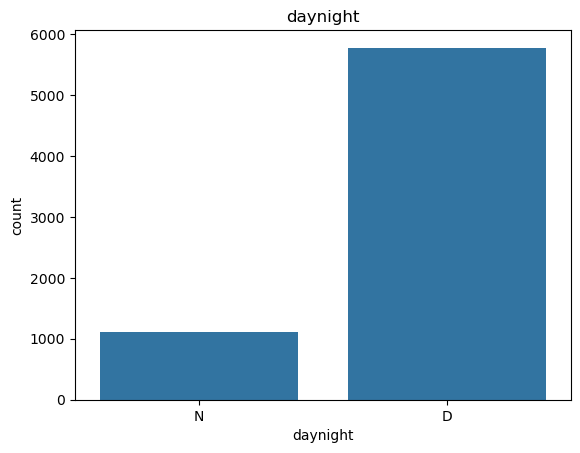

In [28]:
sn.countplot(x='daynight',data=df)
plt.title('daynight')
plt.show()

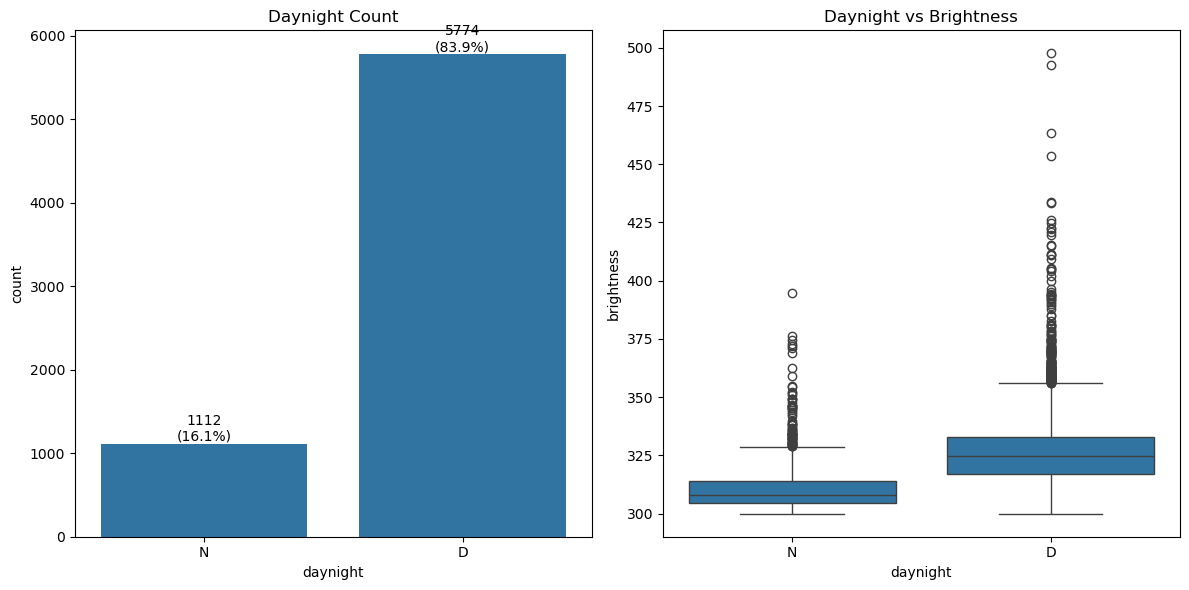

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12,6))


ax1 = sns.countplot(x='daynight', data=df, ax=axes[0])
ax1.set_title('Daynight Count')


total = len(df)
for p in ax1.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax1.annotate(f'{count}\n({percentage:.1f}%)',   # count + percentage
                 (p.get_x() + p.get_width() / 2., count),
                 ha='center', va='bottom', fontsize=10, color='black')


sns.boxplot(x='daynight', y='brightness', data=df, ax=axes[1]).set_title('Daynight vs Brightness')

plt.tight_layout()
plt.show()

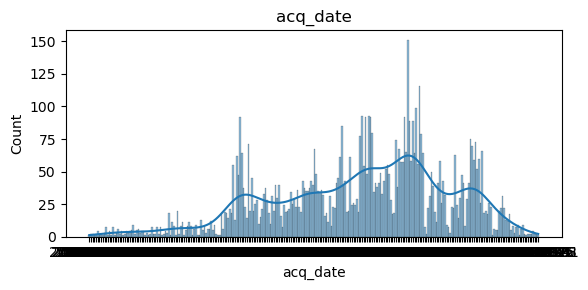

In [54]:
num_cols = ['acq_date']

fig, axes = plt.subplots(1, len(num_cols), figsize=(6,3))

for ax, col in zip([axes], num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

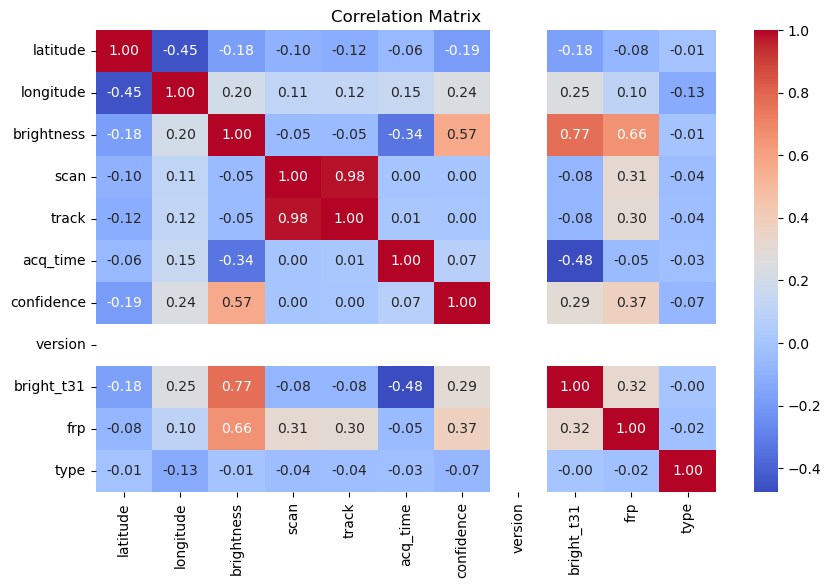

In [56]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [70]:
x=df.drop('acq_date',axis=1)
y=df['acq_date']

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
x_train.shape

(5508, 15)

In [77]:
x_test.shape

(1378, 15)

In [80]:
scaler=StandardScaler()
x_train[num_cols]=scaler.fit_transform(x_train[num_cols])
x_test[num_cols]=scaler.transform(x_test[num_cols])

In [81]:
x_train

,latitude,longitude,brightness,scan,track,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year
969,-0.672476,-0.040766,0.534048,-0.569983,-0.354681,-0.634845,Terra,MODIS,-0.803079,-8.881784e-16,1.020848,-0.268540,D,-0.067214,2002
6566,0.483207,-0.340041,-0.850891,0.121743,0.086010,-0.651864,Terra,MODIS,0.167204,-8.881784e-16,-0.768859,-0.329882,D,-0.067214,2002
4338,-0.259120,0.605939,-0.194522,1.228504,1.408085,-0.547317,Terra,MODIS,-0.102319,-8.881784e-16,0.434745,-0.090268,D,-0.067214,2002
5514,-1.086247,-0.110136,1.964934,-0.154948,0.086010,0.050790,Aqua,MODIS,1.622629,-8.881784e-16,0.403347,1.286074,D,-0.067214,2002
5985,2.478322,-1.399083,-1.192203,-0.708328,-0.795373,0.053222,Aqua,MODIS,-0.641365,-8.881784e-16,-1.417759,-0.467899,D,-0.067214,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.787288,1.187501,0.153354,-0.016602,0.086010,-0.605669,Terra,MODIS,-0.856984,-8.881784e-16,0.424279,-0.234036,D,-0.067214,2002
5191,0.153487,-0.720975,-0.286413,0.398433,0.526702,-0.133991,Aqua,MODIS,0.059395,-8.881784e-16,0.037032,-0.249371,D,-0.067214,2002
5226,-0.999536,-0.227530,0.113972,0.121743,0.086010,0.065378,Aqua,MODIS,0.167204,-8.881784e-16,0.162626,-0.122855,D,-0.067214,2002
5390,-0.948739,-0.214770,-0.279850,-0.154948,0.086010,-0.649433,Terra,MODIS,0.275013,-8.881784e-16,0.110295,-0.318380,D,-0.067214,2002
